### 1. Loading the SQLite database

In [111]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("sales_data.db")

##### This cell imports the built-in sqlite3 module and connects to the sales_data.db database file. If the file doesn’t exist, SQLite will create one automatically.

### 2. Running an SQL query

In [112]:
query = """
SELECT "Product Name", 
       SUM("Units Sold") AS total_qty, 
       SUM("Units Sold" * "Unit Price") AS revenue 
FROM sales_data
GROUP BY "Product Name"
"""

##### This SQL query aggregates the data by product name, calculating total quantity sold and total revenue (units sold * unit price) per product.

In [113]:
import pandas as pd

# Run query and load results into a DataFrame
df = pd.read_sql_query(query, conn)

# Display the result
print(df)

                                          Product Name  total_qty  revenue
0                                1984 by George Orwell          4    79.96
1                              Adidas 3-Stripes Shorts          5   149.95
2                         Adidas Essential Track Pants          3   134.97
3                       Adidas FIFA World Cup Football          3    89.97
4                  Adidas Originals Superstar Sneakers          4   319.96
..                                                 ...        ...      ...
227           Yeti Tundra Haul Portable Wheeled Cooler          1   399.99
228  Youth to the People Superfood Antioxidant Clea...          1    36.00
229                                  Zara Summer Dress          3   179.97
230                                      iPhone 14 Pro          2  1999.98
231                               iRobot Braava Jet M6          1   449.99

[232 rows x 3 columns]


##### Used pandas.read_sql_query to execute the SQL query and store the results in a DataFrame. Then printed the DataFrame to view the summarized sales data.

### 3. Plotting a bar chart and saving it

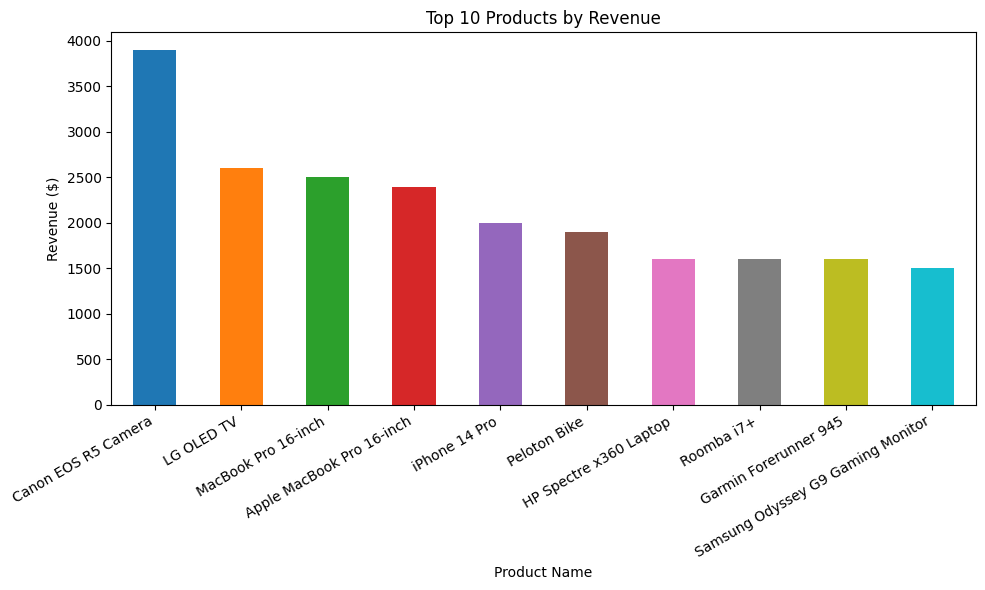

In [114]:
import matplotlib.pyplot as plt
import numpy as np

query = "SELECT * FROM sales_data"
df = pd.read_sql_query(query, conn)

# Get top 10 products by revenue
top_products = df.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending=False).head(10)

# Generate colors using a colormap
colors = plt.cm.tab10(np.linspace(0, 1, len(top_products)))

# Plot
top_products.plot(kind='bar', color=colors, figsize=(10, 6))

plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue ($)")
plt.xlabel("Product Name")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig("sales_chart.png")

# Display the plot
plt.show()

##### Used matplotlib to generate a bar chart showing total revenue for top 10 products by revenue. 